In [6]:
"""
Owner: Muhammad Waleed Usman
Date: 8th April, 2021
"""

'\nOwner: Muhammad Waleed Usman\nDate: 8th April, 2021\n'

In [35]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from collections import Counter
from matplotlib.pyplot import figure

In [8]:
def degree_distribution(input_graph):
    """Plot degree Distribution
    :param input_graph: Input Graph
    :return: figure to plot
    """
    degree_sequence = sorted([d for n, d in input_graph.degree()], reverse=True)  # degree sequence
    degree_count = Counter(degree_sequence)
    deg, cnt = zip(*degree_count.items())
    plt.clf()
    plt.bar(deg, cnt, width=0.80, color="b")
    plt.title("Degree Histogram")
    plt.ylabel("Count")
    plt.xlabel("Degree")
    plt.show()

In [40]:
def shortest_path(input_graph):
    med_list=[]
    length = dict(nx.all_pairs_shortest_path_length(input_graph))
    for key in length.items():
        for i , v in key[1].items():
            med_list.append(v)
    plt.clf()
    plt.hist(med_list)

In [10]:
def cc_distribution(input_graph):
    cluster_network = nx.clustering(input_graph)
    plt.clf()
    color_map = plt.get_cmap('hsv')
    norm = plt.Normalize(0, max(cluster_network.values()))
    node_colors = [color_map(norm(cluster_network[node])) for node in input_graph.nodes]
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))
    nx.draw_spring(input_graph, node_color=node_colors, with_labels=True, ax=ax1)
    fig.colorbar(ScalarMappable(cmap=color_map, norm=norm), label='Clustering', shrink=0.95, ax=ax1)
    ax2.hist(cluster_network.values(), bins=2)
    ax2.set_xlabel('Clustering')
    ax2.set_ylabel('Frequency')
    plt.tight_layout()
    plt.show()

In [11]:
def wcc_distribution(input_graph):
    """Plot weakly connected components size distributions
    :param input_graph: input graph for the wcc distribution
    """
    wcc_graph = nx.weakly_connected_components(input_graph)
    wcc_sizes = Counter([len(wcc) for wcc in wcc_graph])
    size_seq = sorted(wcc_sizes.keys())
    size_hist = [wcc_sizes[x] for x in size_seq]
    plt.clf()
    plt.figure(figsize=(16, 12))
    plt.title("wcc distribution")
    plt.xlabel("size")
    plt.ylabel("wcc")
    plt.loglog(size_seq, size_hist, 'ro-')


In [14]:
medicine_ADE_df = pd.read_csv('data/medicine_side_effects_extraction.csv', index_col=False)
print('Medicine Side Effects DataSet dataframe')
medicine_ADE_df.head()

Medicine Side Effects DataSet dataframe


,value,code,formula,side effect
0,-4095,C0043096,methadone,weight loss
1,-4095,C0043094,methadone,weight gain
2,-4095,C0080274,methadone,urinary retention
3,-4095,C0030252,methadone,palpitations
4,-4095,C0009806,methadone,constipation


In [17]:
medicine_graph_graph= nx.from_pandas_edgelist(medicine_ADE_df, 'formula', 'side effect', create_using=nx.DiGraph())


In [45]:
nx.info(medicine_graph_graph)

'Name: \nType: DiGraph\nNumber of nodes: 2273\nNumber of edges: 61102\nAverage in degree:  26.8817\nAverage out degree:  26.8817'

In [44]:
if nx.is_connected:
    print('Connected')
else:
    print('Not Connected')

Connected


In [46]:
if nx.is_strongly_connected:
    print("Strongly Connected ")

Strongly Connected 


In [57]:
first_five = medicine_ADE_df['formula'].head(5)
medicine_graph_graph.in_degree(first_five)

InDegreeView({'methadone': 0})

In [58]:
medicine_graph_graph.out_degree(first_five)

OutDegreeView({'methadone': 59})

In [74]:
source_node = list(medicine_graph_graph.edges())[0]
source_node

('methadone', 'weight loss')

In [75]:
target_node = list(medicine_graph_graph.edges())[-1]
target_node

('methazolamide', 'malaise')

In [77]:
average_degree = sum(dict(medicine_graph_graph.degree()).values())/float(len(medicine_graph_graph))
average_degree

53.76330840299164

In [78]:
average_out_degree = sum(dict(medicine_graph_graph.in_degree()).values())/float(len(medicine_graph_graph))
average_out_degree

26.88165420149582

In [79]:
average_in_degree = sum(dict(medicine_graph_graph.out_degree()).values())/float(len(medicine_graph_graph))
average_in_degree

26.88165420149582

In [80]:
nx.is_weakly_connected(medicine_graph_graph)

True

In [81]:
nx.average_clustering(medicine_graph_graph)

0.0

<ipython-input-36-6b5e4628cdb5>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  medicine_graph_graph_fig.show()


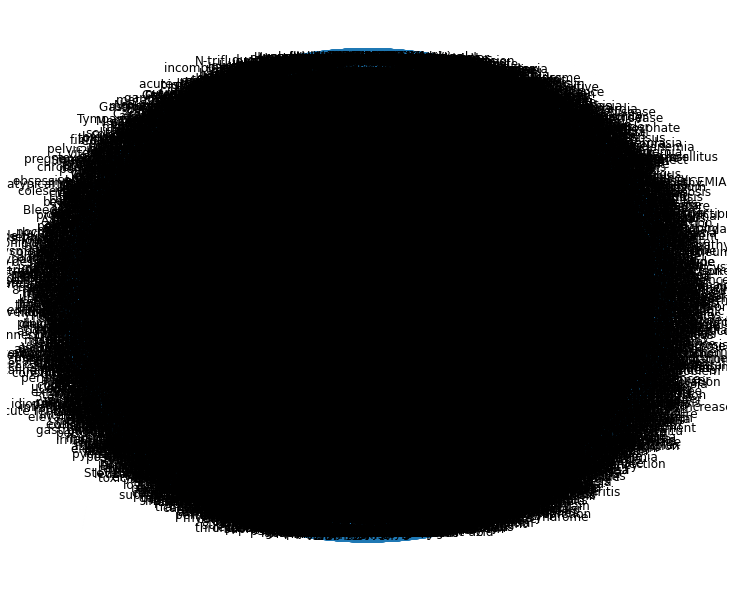

In [36]:
medicine_graph_graph_fig = figure(figsize=(10, 8))
nx.draw_shell(medicine_graph_graph, with_labels=True)
medicine_graph_graph_fig.show()

In [29]:
erdos_renyi_graph = nx.erdos_renyi_graph(n=2273, p=1,  seed=None, directed=True)
watts_strogatz_graph = nx.watts_strogatz_graph(n=2273, k=2, p=0.1, seed=None)
watts_strogatz_graph = nx.DiGraph(watts_strogatz_graph)

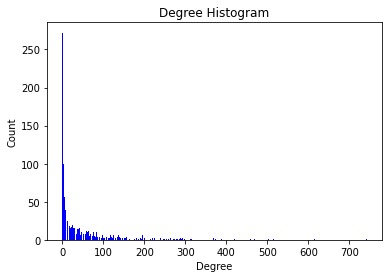

In [20]:
##degree distribution for medicine side effect

degree_distribution(medicine_graph_graph)

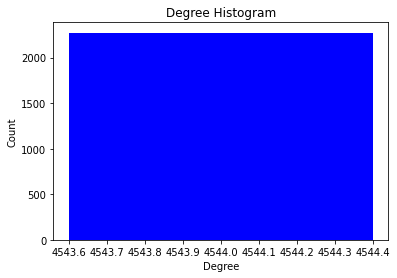

In [21]:
degree_distribution(erdos_renyi_graph)

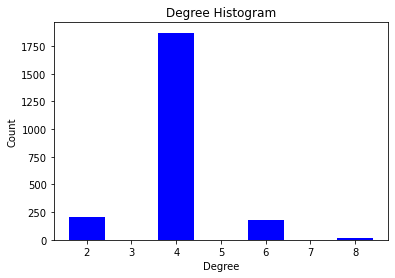

In [22]:
degree_distribution(watts_strogatz_graph)

In [100]:
##################################### Shortest Path Distribution ######################################################

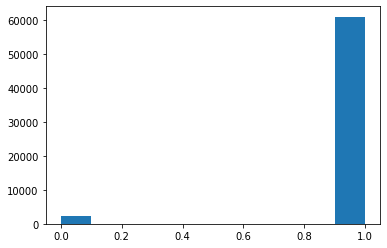

In [41]:
shortest_path(medicine_graph_graph)

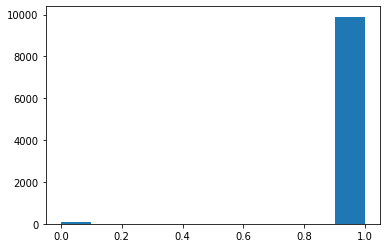

In [42]:
shortest_path(erdos_renyi_graph)

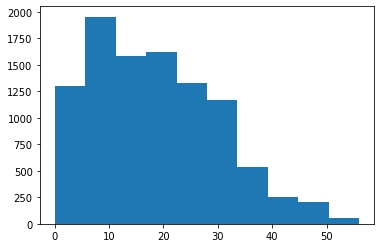

In [43]:
shortest_path(watts_strogatz_graph)

In [107]:
##################################### Clustering Coefficient Distributions ######################################################

<Figure size 432x288 with 0 Axes>

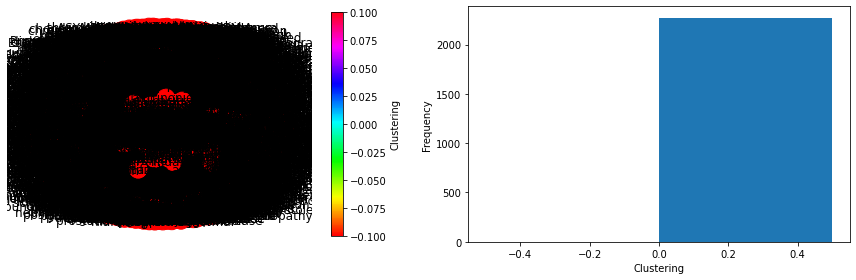

In [27]:
cc_distribution(medicine_graph_graph)

<Figure size 432x288 with 0 Axes>

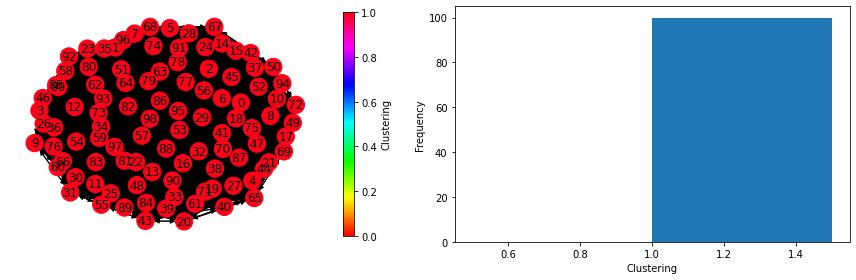

In [30]:
cc_distribution(erdos_renyi_graph)


<Figure size 432x288 with 0 Axes>

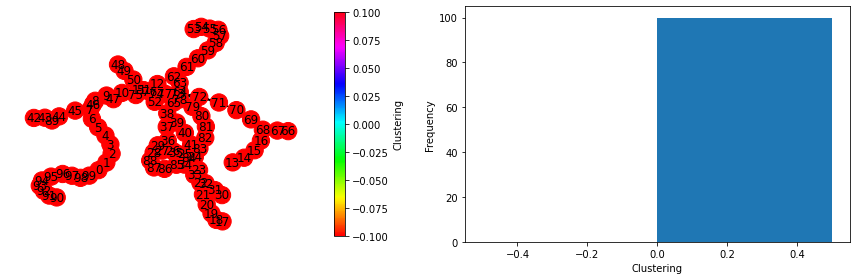

In [31]:
cc_distribution(watts_strogatz_graph)

In [114]:
##################################### WCC Distributions ######################################################

<Figure size 432x288 with 0 Axes>

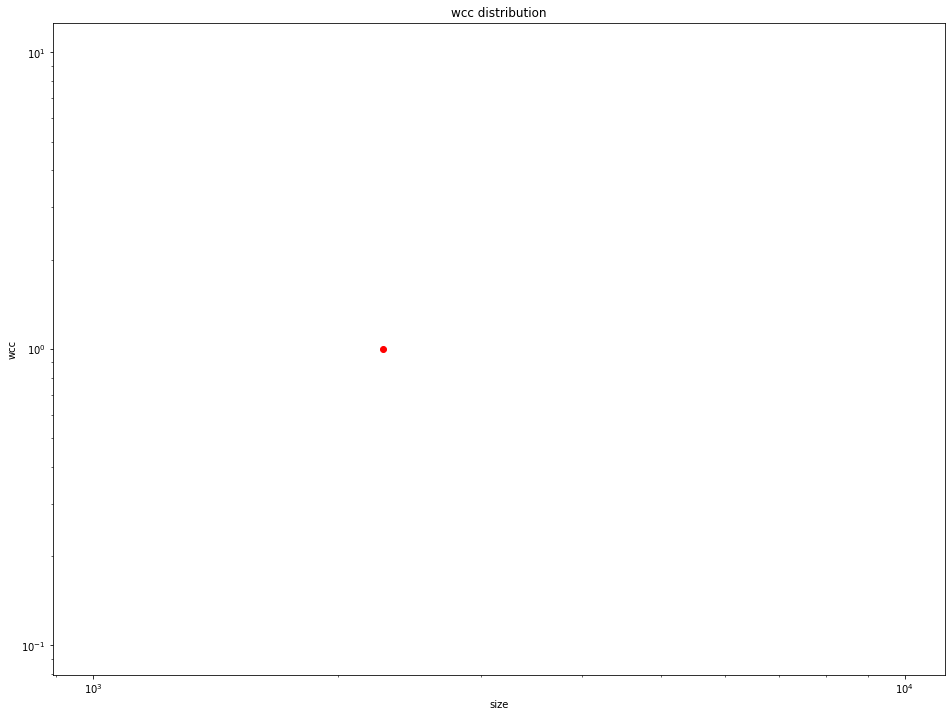

In [32]:
wcc_distribution(medicine_graph_graph)

<Figure size 432x288 with 0 Axes>

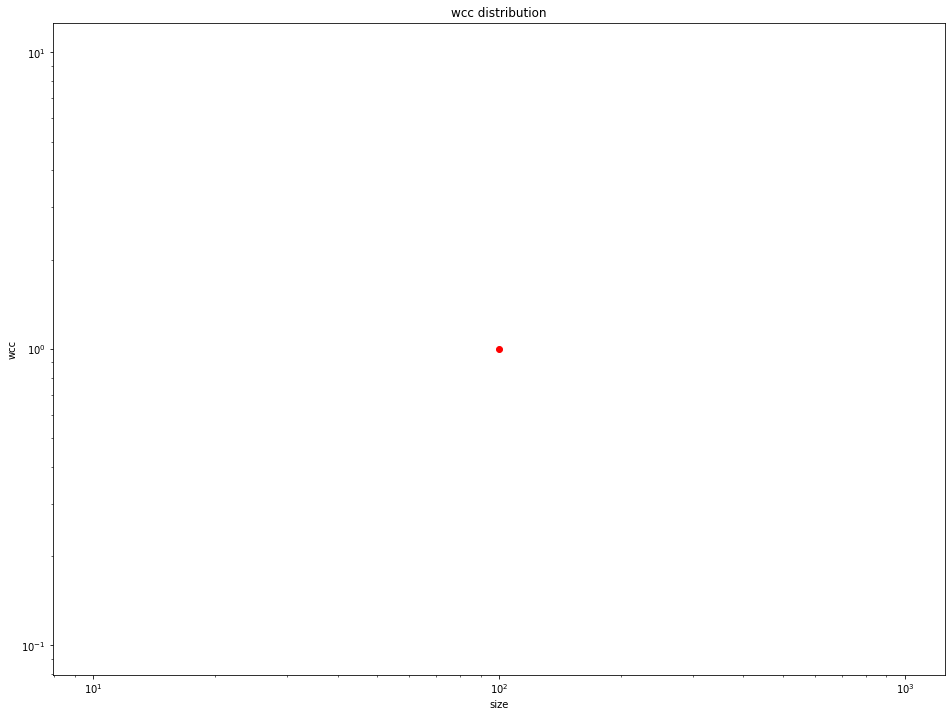

In [33]:
wcc_distribution(erdos_renyi_graph)

<Figure size 432x288 with 0 Axes>

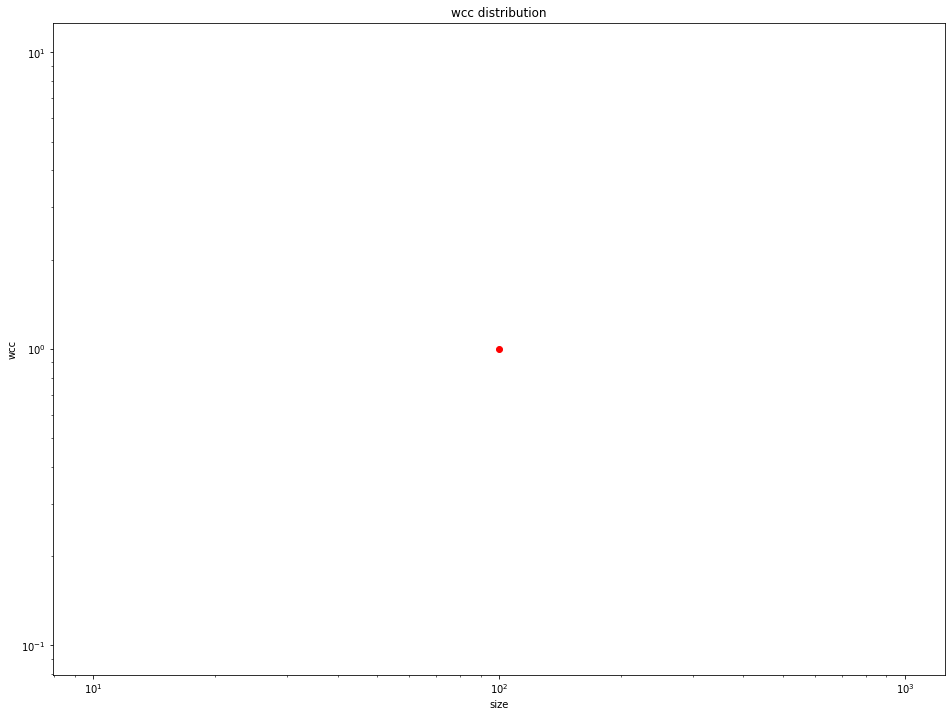

In [34]:
wcc_distribution(watts_strogatz_graph)